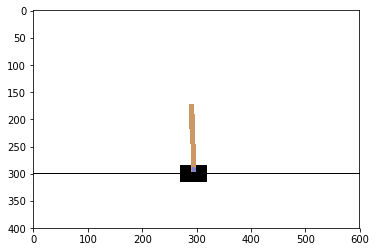

In [1]:
import gym
import numpy as np
import seaborn as sns
from gym import logger
import matplotlib.pyplot as plt
%matplotlib inline
logger.set_level(logger.ERROR)

env = gym.make('CartPole-v1')
env.reset()
plt.imshow(env.render(mode='rgb_array'))
env.close()

Mean random agent reward:  21.03


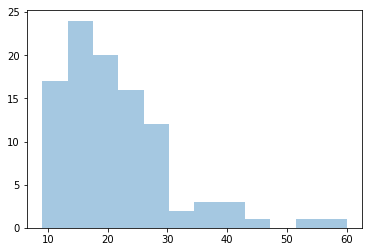

In [2]:
from src.rl.RandomAgent import RandomAgent
from src.rl.util import run_episode

agent = RandomAgent()
dist = [run_episode(env, agent, max_length=100) for _ in range(1000)]
sns.distplot(dist, kde=False)
print("Mean random agent reward: ", np.mean(dist))

Trained for  10000  episodes. Last episode achieved a reward of  25.0 . Last episode run: 


/home/ralars/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


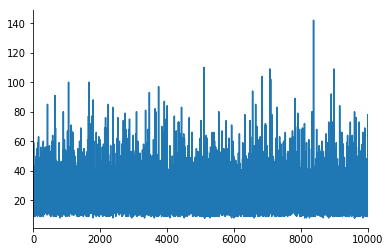

In [3]:
from src.rl.TabularQAgent import TabularQAgent

agent = TabularQAgent(0.1, 0.5, 0.99)


def run_experiment(env, agent, epsilon_decay, n_episodes) -> list:
    rewards = []
    for i in range(n_episodes):
        sum_r = run_episode(env, agent, learn=True)
        rewards.append(sum_r)
        agent.epsilon *= epsilon_decay
    agent.epsilon = 0
    sum_r = run_episode(env, agent)
    print('Trained for ', n_episodes, ' episodes. Last episode achieved a reward of ', sum_r, '. Last episode run: ')     
    #env.render(mode='path', ss=ss)
    return rewards


#run_episode(env, agent, learn=True)
rewards = run_experiment(env, agent, 0.99, 1000)
sns.tsplot(rewards)
sns.despine()

Compare random histogram to histogram of training - does it look different? How come?

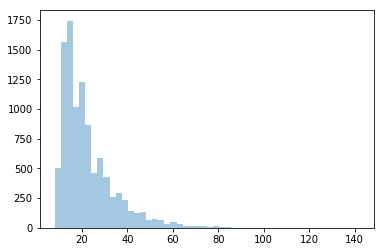

In [4]:
sns.distplot(rewards, kde=False)